In [1]:
!git clone https://github.com/RWN-MD/CRISP-DM-Udacity-Project.git

Cloning into 'CRISP-DM-Udacity-Project'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), done.


In [5]:
from google.colab import files
uploaded = files.upload()

Saving grp_public_reporting_cahps.csv to grp_public_reporting_cahps (1).csv


In [114]:
import pandas as pd

# Load the dataset
data = pd.read_csv('grp_public_reporting_cahps.csv')

# Display the first few rows
data.head()

,Facility Name,org_PAC_ID,measure_cd,measure_title,prf_rate,patient_count,FN
0,USC CARE MEDICAL GROUP INC,446157747,CAHPS_GRP_1,"CAHPS for MIPS SSM: Getting Timely Care, Appoi...",58.0,110.0,NaN
1,THE ASSOCIATION OF UNIVERSITY PHYSICIANS,446162697,CAHPS_GRP_1,"CAHPS for MIPS SSM: Getting Timely Care, Appoi...",52.0,129.0,NaN
2,CITY MEDICAL OF UPPER EAST SIDE PLLC,648465039,CAHPS_GRP_1,"CAHPS for MIPS SSM: Getting Timely Care, Appoi...",NaN,NaN,1.0
3,CAPE PHYSICIANS ASSOCIATES PA,749333730,CAHPS_GRP_1,"CAHPS for MIPS SSM: Getting Timely Care, Appoi...",67.0,197.0,NaN
4,ALLIANCE PHYSICIANS INC,840104360,CAHPS_GRP_1,"CAHPS for MIPS SSM: Getting Timely Care, Appoi...",59.0,227.0,NaN


In [115]:
# Summary of data types and non-null counts
data.info()

# Statistical summary of numeric columns
data.describe()

# Count of missing values per column
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Facility Name   432 non-null    object 
 1    org_PAC_ID     432 non-null    int64  
 2    measure_cd     432 non-null    object 
 3    measure_title  432 non-null    object 
 4    prf_rate       277 non-null    float64
 5    patient_count  277 non-null    float64
 6    FN             155 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 23.8+ KB


,0
Facility Name,0
org_PAC_ID,0
measure_cd,0
measure_title,0
prf_rate,155
patient_count,155
FN,277


In [116]:
# Percentage of missing values per column
missing_values = data.isnull().sum() / len(data) * 100
print("Percentage of Missing Values per Column:")
print(missing_values)

Percentage of Missing Values per Column:
Facility Name      0.00000
 org_PAC_ID        0.00000
 measure_cd        0.00000
 measure_title     0.00000
 prf_rate         35.87963
 patient_count    35.87963
 FN               64.12037
dtype: float64


In [106]:
uploaded = files.upload()

Saving DOC_Data_Dictionary.pdf to DOC_Data_Dictionary (1).pdf


In [117]:
# Clean column names by stripping leading/trailing whitespace
data.columns = data.columns.str.strip()

# Drop the FN column
data = data.drop(columns=['FN'])
print("FN column removed due to high missing values and administrative nature.")

FN column removed due to high missing values and administrative nature.


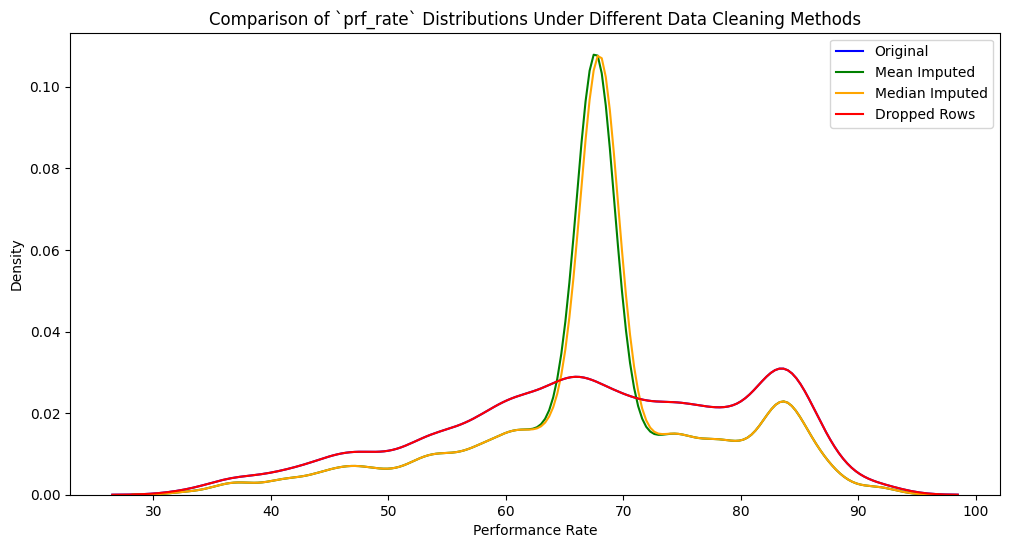

In [118]:
# Original Data (includes missing values)
original_data = data.copy()

# Mean Imputation
mean_imputed = data.copy()
mean_imputed['prf_rate'] = mean_imputed['prf_rate'].fillna(mean_imputed['prf_rate'].mean())

# Median Imputation
median_imputed = data.copy()
median_imputed['prf_rate'] = median_imputed['prf_rate'].fillna(median_imputed['prf_rate'].median())

# Dropped Rows (rows with missing 'prf_rate' removed)
dropped_data = data.dropna(subset=['prf_rate'])

# Plot the distributions
plt.figure(figsize=(12, 6))

sns.kdeplot(original_data['prf_rate'], label='Original', color='blue', bw_adjust=0.5)
sns.kdeplot(mean_imputed['prf_rate'], label='Mean Imputed', color='green', bw_adjust=0.5)
sns.kdeplot(median_imputed['prf_rate'], label='Median Imputed', color='orange', bw_adjust=0.5)
sns.kdeplot(dropped_data['prf_rate'], label='Dropped Rows', color='red', bw_adjust=0.5)

plt.title("Comparison of `prf_rate` Distributions Under Different Data Cleaning Methods")
plt.xlabel('Performance Rate')
plt.ylabel('Density')
plt.legend()
plt.show()

In [119]:
from scipy.stats import ks_2samp

# K-S Test between Original Data (dropped NaNs) and Mean Imputed Data
ks_stat_mean, p_value_mean = ks_2samp(dropped_data['prf_rate'], mean_imputed['prf_rate'])
print(f"K-S Test between Dropped Rows and Mean Imputed Data: KS Statistic = {ks_stat_mean:.3f}, P-value = {p_value_mean:.3f}")

# K-S Test between Original Data (dropped NaNs) and Median Imputed Data
ks_stat_median, p_value_median = ks_2samp(dropped_data['prf_rate'], median_imputed['prf_rate'])
print(f"K-S Test between Dropped Rows and Median Imputed Data: KS Statistic = {ks_stat_median:.3f}, P-value = {p_value_median:.3f}")


K-S Test between Dropped Rows and Mean Imputed Data: KS Statistic = 0.184, P-value = 0.000
K-S Test between Dropped Rows and Median Imputed Data: KS Statistic = 0.175, P-value = 0.000


In [120]:
cleaned_data = data.dropna(subset=['prf_rate', 'patient_count'])
print(f"Percentage of rows with complete data: {len(cleaned_data) / len(data) * 100:.2f}%")

Percentage of rows with complete data: 64.12%


In [121]:
# Identify outliers using Z-scores
from scipy.stats import zscore

z_scores = np.abs(zscore(cleaned_data[['prf_rate', 'patient_count']].dropna()))
outliers = np.where(z_scores > 3)  # Z-score > 3 is a common threshold
print(f"Number of outliers detected: {len(outliers[0])}")

Number of outliers detected: 0


In [122]:
# Value counts for measure_cd and measure_title
print(cleaned_data['measure_cd'].value_counts())
print(cleaned_data['measure_title'].value_counts())

# Group by measure_cd and calculate mean for prf_rate and patient_count
grouped_data = cleaned_data.groupby('measure_cd')[['prf_rate', 'patient_count']].mean()
print(grouped_data)


measure_cd
CAHPS_GRP_8    53
CAHPS_GRP_1    52
CAHPS_GRP_5    51
CAHPS_GRP_4    49
CAHPS_GRP_9    46
CAHPS_GRP_3    26
Name: count, dtype: int64
measure_title
CAHPS for MIPS SSM: Courteous and Helpful Office Staff                    53
CAHPS for MIPS SSM: Getting Timely Care, Appointments, and Information    52
CAHPS for MIPS SSM: Health Promotion and Education                        51
CAHPS for MIPS SSM: Access to Specialists                                 49
CAHPS for MIPS SSM: Care Coordination                                     46
CAHPS for MIPS SSM: Patient's Rating of Provider                          26
Name: count, dtype: int64
              prf_rate  patient_count
measure_cd                           
CAHPS_GRP_1  63.788462     154.884615
CAHPS_GRP_3  83.307692     199.269231
CAHPS_GRP_4  48.551020     142.346939
CAHPS_GRP_5  62.470588     214.156863
CAHPS_GRP_8  82.622642     184.169811
CAHPS_GRP_9  72.217391     214.630435


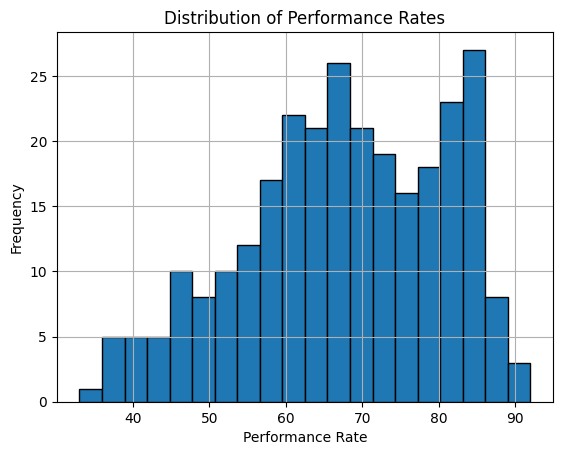

In [126]:
import matplotlib.pyplot as plt

# Histogram
cleaned_data['prf_rate'].hist(bins=20, edgecolor='black')
plt.title('Distribution of Performance Rates')
plt.xlabel('Performance Rate')
plt.ylabel('Frequency')
plt.show()

In [127]:
quartiles = data['patient_count'].quantile([0.25, 0.75])
low_volume = data[data['patient_count'] <= quartiles[0.25]]
high_volume = data[data['patient_count'] >= quartiles[0.75]]

print(f"Low Volume Mean Performance: {low_volume['prf_rate'].mean():.2f}")
print(f"High Volume Mean Performance: {high_volume['prf_rate'].mean():.2f}")

Low Volume Mean Performance: 64.41
High Volume Mean Performance: 71.57


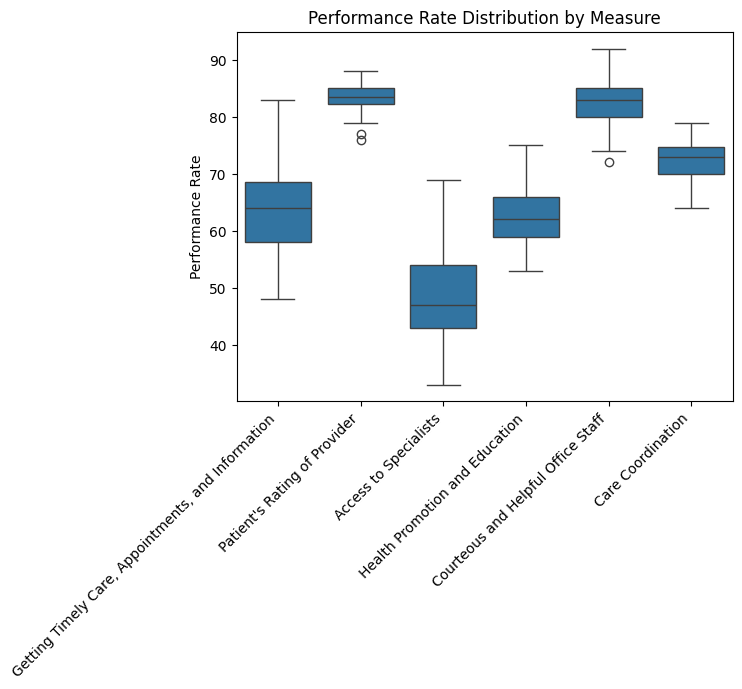

In [141]:
import seaborn as sns

# Remove the prefix and create a new column for cleaner labels
cleaned_data = cleaned_data.copy()
cleaned_data.loc[:, 'measure_title_clean'] = cleaned_data['measure_title'].str.replace('CAHPS for MIPS SSM: ', '', regex=False)

# Boxplot for performance rates by measure
sns.boxplot(data=cleaned_data, x='measure_title_clean', y='prf_rate')
plt.xticks(rotation=45, ha='right')
plt.title('Performance Rate Distribution by Measure')
plt.ylabel('Performance Rate')
plt.xlabel('')
plt.show()



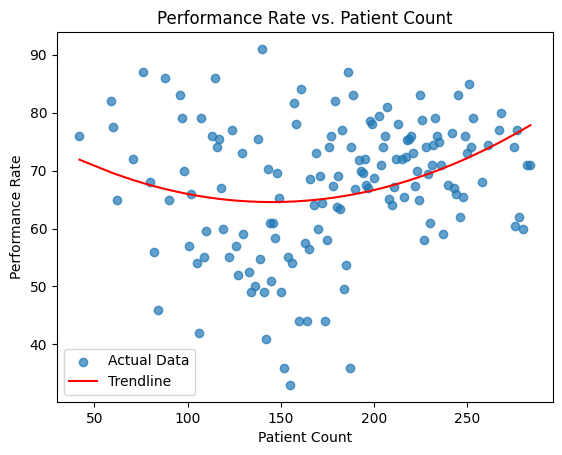

In [142]:
import numpy as np

# Scatter plot with trendline
grouped_data = cleaned_data.groupby('patient_count')['prf_rate'].mean().reset_index()
x = grouped_data['patient_count']
y = grouped_data['prf_rate']
z = np.polyfit(x, y, 2)  # Fit a quadratic curve
p = np.poly1d(z)

plt.scatter(x, y, label='Actual Data', alpha=0.7)
plt.plot(x, p(x), color='red', label='Trendline')
plt.xlabel('Patient Count')
plt.ylabel('Performance Rate')
plt.title('Performance Rate vs. Patient Count')
plt.legend()
plt.show()

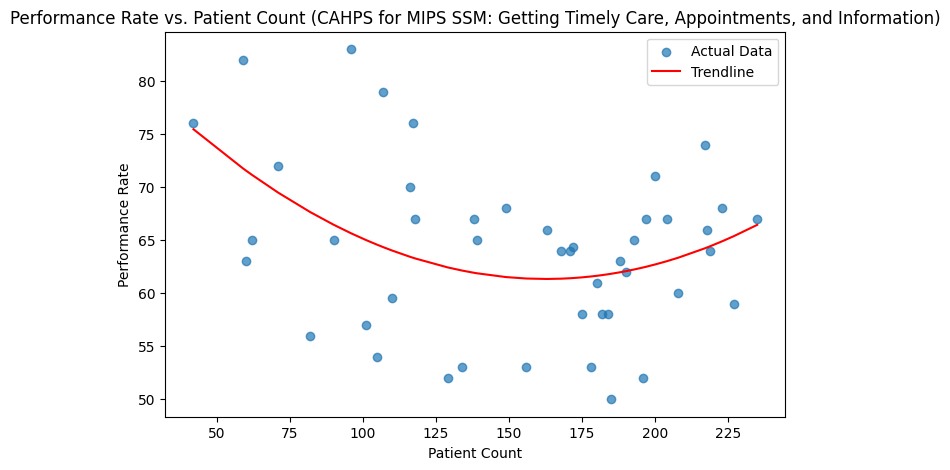

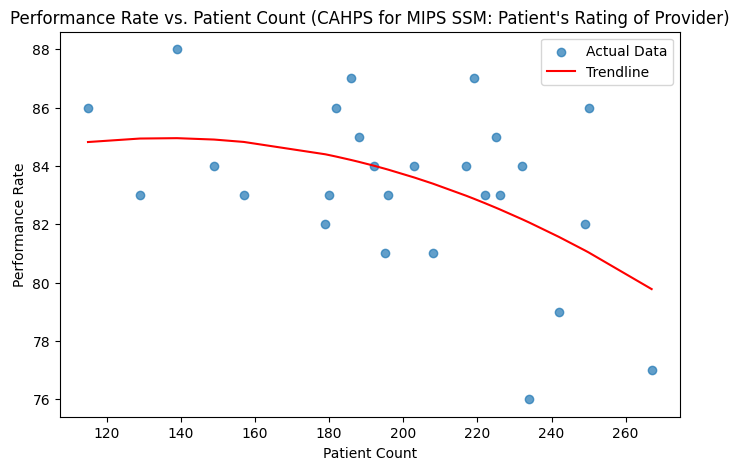

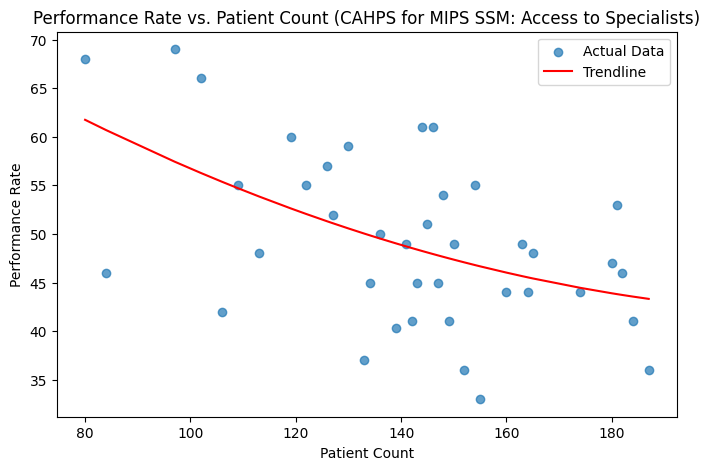

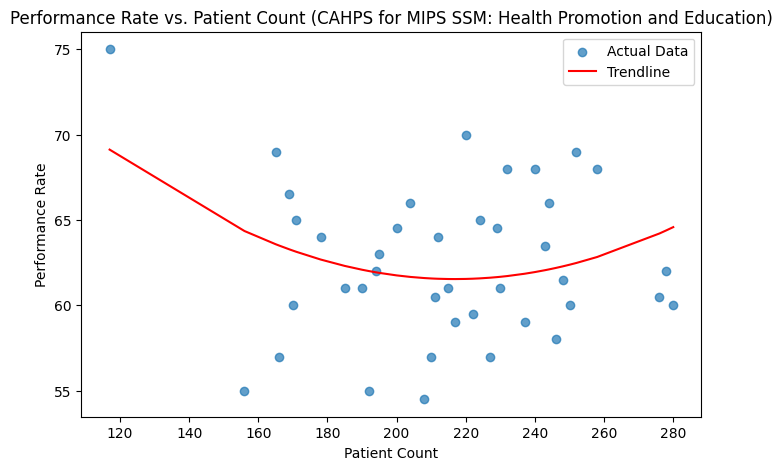

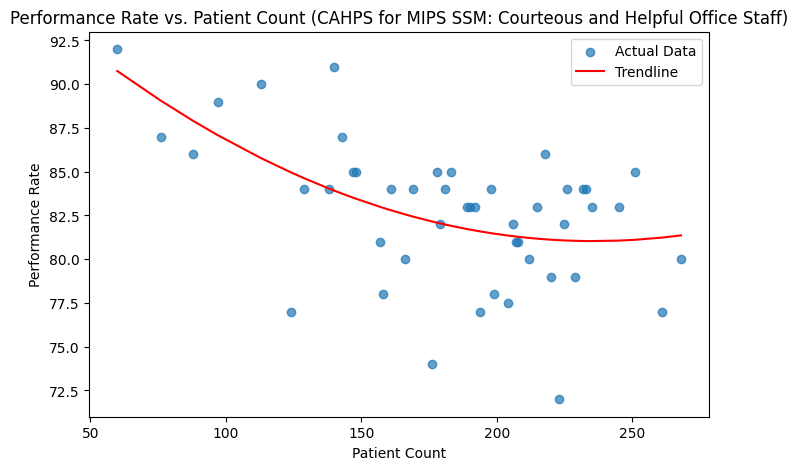

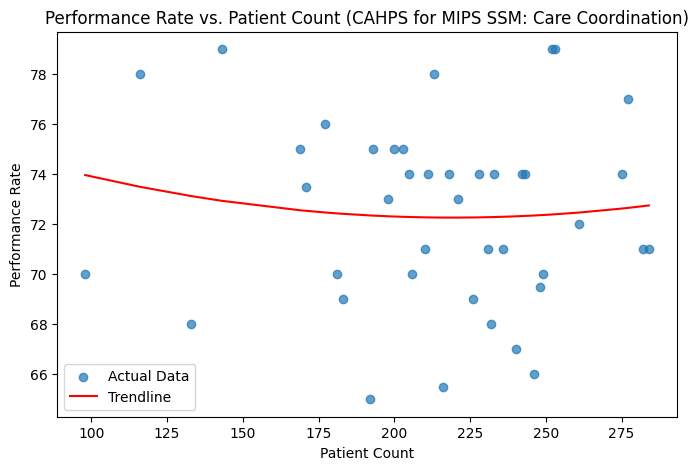

In [143]:
# Iterate through each measure and create a scatter plot with trendline
for measure in cleaned_data['measure_title'].unique():
    # Subset the data for the current measure
    subset = cleaned_data[cleaned_data['measure_title'] == measure]

    # Group by patient count and calculate mean performance rate
    grouped_data = subset.groupby('patient_count')['prf_rate'].mean().reset_index()

    # Scatter plot with trendline
    x = grouped_data['patient_count']
    y = grouped_data['prf_rate']
    z = np.polyfit(x, y, 2)
    p = np.poly1d(z)

    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, label='Actual Data', alpha=0.7)
    plt.plot(x, p(x), color='red', label='Trendline')
    plt.xlabel('Patient Count')
    plt.ylabel('Performance Rate')
    plt.title(f'Performance Rate vs. Patient Count ({measure})')
    plt.legend()
    plt.show()


In [144]:
from scipy.stats import pearsonr

# Correlation analysis and statistical tests across all measures
print("Correlations and Statistical Significance Between Patient Count and Performance Rate by Measure:")
for measure in cleaned_data['measure_title'].unique():
    subset = cleaned_data[cleaned_data['measure_title'] == measure]

    if len(subset) > 2:  # Ensure enough data points
        # Calculate correlation
        corr, p_value = pearsonr(subset['patient_count'].dropna(), subset['prf_rate'].dropna())
        print(f"{measure}: Correlation = {corr:.3f}, P-value = {p_value:.3f}")


Correlations and Statistical Significance Between Patient Count and Performance Rate by Measure:
CAHPS for MIPS SSM: Getting Timely Care, Appointments, and Information: Correlation = -0.245, P-value = 0.080
CAHPS for MIPS SSM: Patient's Rating of Provider: Correlation = -0.452, P-value = 0.020
CAHPS for MIPS SSM: Access to Specialists: Correlation = -0.435, P-value = 0.002
CAHPS for MIPS SSM: Health Promotion and Education: Correlation = -0.143, P-value = 0.318
CAHPS for MIPS SSM: Courteous and Helpful Office Staff: Correlation = -0.488, P-value = 0.000
CAHPS for MIPS SSM: Care Coordination: Correlation = -0.078, P-value = 0.605


In [145]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define a function for preprocessing
def preprocess_data(data, measure):
    # Subset data for the specific measure
    subset = data[data['measure_title'] == measure]
    X = subset[['patient_count']].values
    y = subset['prf_rate'].values

    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test


Evaluating models for: CAHPS for MIPS SSM: Patient's Rating of Provider
Linear Regression: MAE = 1.42, RMSE = 1.54
Random Forest: MAE = 2.37, RMSE = 2.97
Support Vector Regressor (SVR): MAE = 1.81, RMSE = 2.05
Quadratic Fit: MAE = 1.72, RMSE = 1.82

Evaluating models for: CAHPS for MIPS SSM: Access to Specialists
Linear Regression: MAE = 6.04, RMSE = 7.12
Random Forest: MAE = 8.25, RMSE = 9.76
Support Vector Regressor (SVR): MAE = 5.03, RMSE = 5.75
Quadratic Fit: MAE = 6.41, RMSE = 8.08

Evaluating models for: CAHPS for MIPS SSM: Courteous and Helpful Office Staff
Linear Regression: MAE = 2.74, RMSE = 3.33
Random Forest: MAE = 2.40, RMSE = 3.12
Support Vector Regressor (SVR): MAE = 2.21, RMSE = 3.06
Quadratic Fit: MAE = 2.43, RMSE = 3.00

Actual vs. Predicted for: CAHPS for MIPS SSM: Patient's Rating of Provider


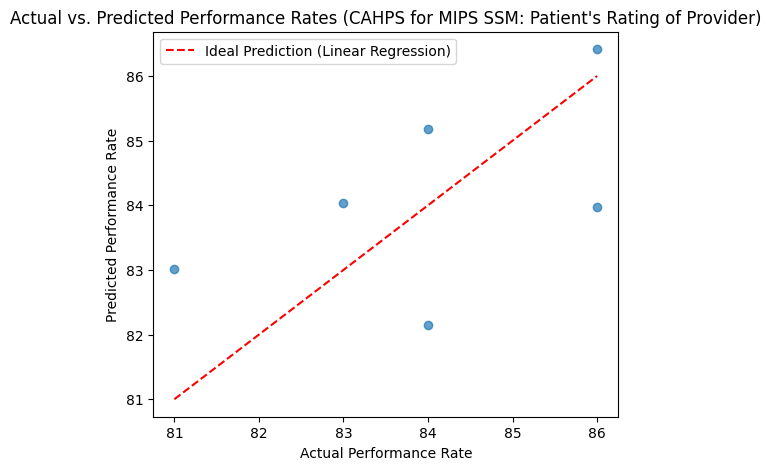


Actual vs. Predicted for: CAHPS for MIPS SSM: Access to Specialists


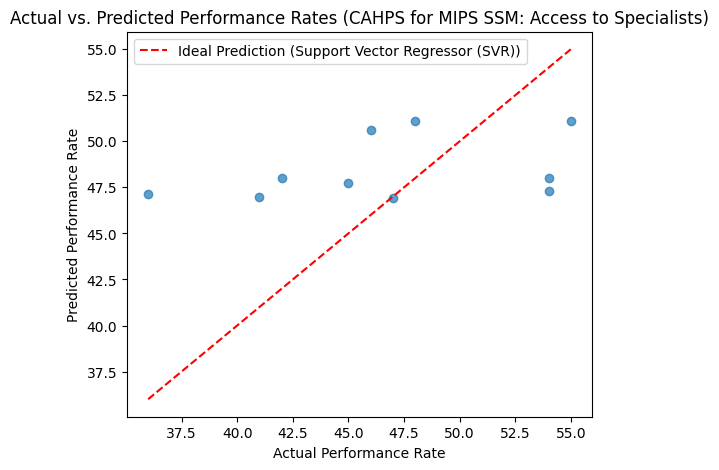


Actual vs. Predicted for: CAHPS for MIPS SSM: Courteous and Helpful Office Staff


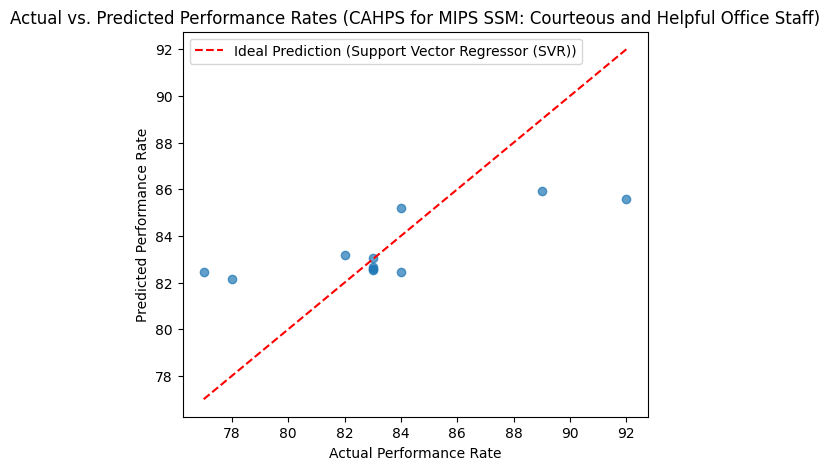

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Regressor (SVR)': SVR(kernel='rbf')
}

# Correlation analysis for all measures
measure_correlations = {}
for measure in data['measure_title'].unique():
    subset = data[data['measure_title'] == measure]
    correlation = subset[['patient_count', 'prf_rate']].corr().iloc[0, 1]
    measure_correlations[measure] = correlation

# Identify highly correlated measures (|correlation| > 0.4)
selected_measures = [measure for measure, corr in measure_correlations.items() if abs(corr) > 0.4]

# Best model storage
best_models = {}

# Identify and evaluate the best model for each selected measure
for measure in set(selected_measures):  # Ensure no duplicates
    print(f"\nEvaluating models for: {measure}")

    # Preprocess data
    X_train, X_test, y_train, y_test = preprocess_data(cleaned_data, measure)

    # Evaluate models
    best_model_name = None
    best_mae = float('inf')
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)

        # Evaluate
        mae = mean_absolute_error(y_test, y_pred)
        rmse = root_mean_squared_error(y_test, y_pred)
        print(f"{model_name}: MAE = {mae:.2f}, RMSE = {rmse:.2f}")

        if mae < best_mae:
            best_mae = mae
            best_model_name = model_name

    # Quadratic Fit
    z = np.polyfit(X_train.flatten(), y_train, 2)
    p = np.poly1d(z)
    y_pred_quad = p(X_test.flatten())
    mae_quad = mean_absolute_error(y_test, y_pred_quad)
    rmse_quad = root_mean_squared_error(y_test, y_pred_quad)
    print(f"Quadratic Fit: MAE = {mae_quad:.2f}, RMSE = {rmse_quad:.2f}")

    # Store the best model
    if mae_quad < best_mae:
        best_mae = mae_quad
        best_model_name = "Quadratic Fit"

    best_models[measure] = best_model_name

# Visualize actual vs. predicted values
for measure in set(selected_measures):
    print(f"\nActual vs. Predicted for: {measure}")

    # Preprocess data
    X_train, X_test, y_train, y_test = preprocess_data(cleaned_data, measure)

    # Get the best model for this measure
    best_model_name = best_models[measure]
    if best_model_name == "Quadratic Fit":
        z = np.polyfit(X_train.flatten(), y_train, 2)
        p = np.poly1d(z)
        y_pred = p(X_test.flatten())
    else:
        best_model = models[best_model_name]
        best_model.fit(X_train, y_train)
        y_pred = best_model.predict(X_test)

    # Scatter plot
    plt.figure(figsize=(6, 5))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label=f'Ideal Prediction ({best_model_name})')
    plt.title(f"Actual vs. Predicted Performance Rates ({measure})")
    plt.xlabel("Actual Performance Rate")
    plt.ylabel("Predicted Performance Rate")
    plt.legend()
    plt.show()